# Scikit.learn

[Scikit.learn](http://scikit-learn.org/stable/) adds lots of machine learning algorithms to Python.

The examples here are necessarily very brief!  Jake Vanderplas has a much more in-depth [tutorial on scikit.learn](https://github.com/jakevdp/sklearn_tutorial).  Many examples taken from there

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from sklearn import datasets, linear_model


# use seaborn plotting defaults
import seaborn as sns; sns.set()

## Linear regression

In [2]:
def linear_data_sample(N=40, rseed=0, m=3, b=-2):
    """Sample N points on the line y = m*x + b + err, where err is normally distributed"""
    rng = np.random.RandomState(rseed)

    x = 10 * rng.rand(N)
    y = m * x + b + 1.5*rng.randn(N)

    return x, y

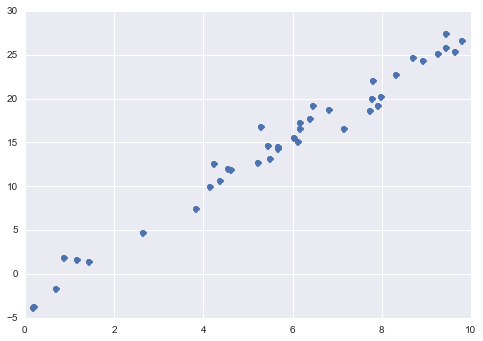

In [3]:
x, y = linear_data_sample()
plt.plot(x, y, 'o');

In [4]:
# Least-squares linear Regression, the pedestrian way
def model(theta, x):
    b, m = theta
    return m * x + b

def square_deviation(theta, x, y):
    return np.sum((model(theta, x) - y) ** 2)

from scipy.optimize import fmin
theta_guess = [0, 1]
theta_fit = fmin(square_deviation, theta_guess, args=(x, y))

b_fit, m_fit = theta_fit
print 'Actual: m = 3, b = -2'
print 'Fit: m = %.2f, b = %.2f' % (m_fit, b_fit)

Optimization terminated successfully.
         Current function value: 67.545975
         Iterations: 76
         Function evaluations: 144
Actual: m = 3, b = -2
Fit: m = 3.04, b = -2.76


In [5]:
# Linear regression, Scikit-learn
regr = linear_model.LinearRegression(fit_intercept=True)
regr.fit(x[:,None], y)   # Trickery to turn a row-vector to a column-vector
print 'Actual: m = 3, b = -2'
print 'Fit: m = %.2f, b = %.2f' % (regr.coef_[0], regr.intercept_)

Actual: m = 3, b = -2
Fit: m = 3.04, b = -2.76


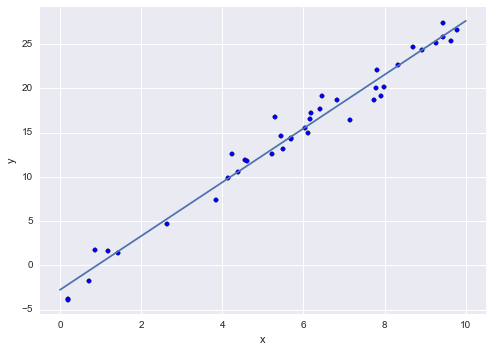

In [6]:
# predict y from the data
x_new = np.linspace(0, 10, 100)
y_new = regr.predict(x_new[:, None])

# plot the results
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axis('tight');

**OBVIOUSLY** you would need to a **LOT** more work with respect to training/test sets, cross-validation, etc. :-D

## Classification

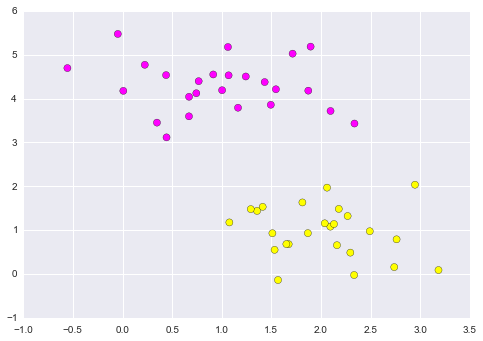

In [7]:
# SVMs
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring');

In [8]:
print X[:10]
print y[:10]

[[ 1.41281595  1.5303347 ]
 [ 1.81336135  1.6311307 ]
 [ 1.43289271  4.37679234]
 [ 1.87271752  4.18069237]
 [ 2.09517785  1.0791468 ]
 [ 2.73890793  0.15676817]
 [ 3.18515794  0.08900822]
 [ 2.06156753  1.96918596]
 [ 2.03835818  1.15466278]
 [-0.04749204  5.47425256]]
[1 1 0 0 1 1 1 1 1 0]


In [9]:
from sklearn.svm import SVC # "Support Vector Classifier"
clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

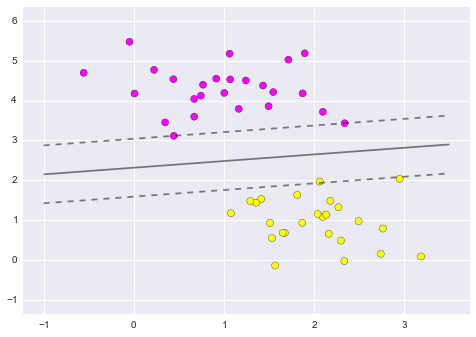

In [10]:
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([xi, yj])
    return ax.contour(X, Y, P, colors='k',
                      levels=[-1, 0, 1], alpha=0.5,
                      linestyles=['--', '-', '--'])



plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf);

In [11]:
# Predict class
print clf.predict((2.5,5))
print clf.predict((0.5, 0))

[0]
[1]


In [12]:
clf.coef_

array([[ 0.22967329, -1.37758262]])

## Dimensionality Reduction (PCA)

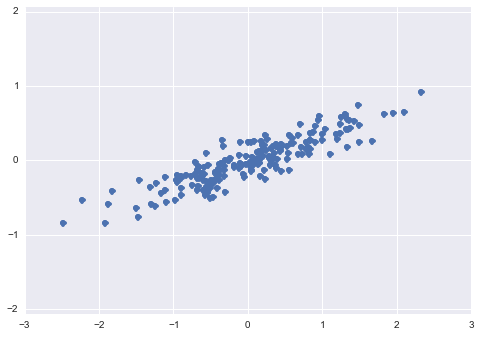

In [13]:
# Two-dimensional data set that's almost 1D
np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
plt.plot(X[:, 0], X[:, 1], 'o')
plt.axis('equal');

In [14]:
# Apply PCA with two components to this data
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_)
print(pca.components_)

[ 0.75871884  0.01838551]
[[ 0.94446029  0.32862557]
 [ 0.32862557 -0.94446029]]


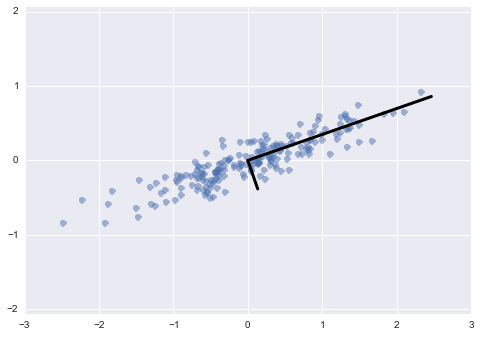

In [15]:
# Visualize components
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal');

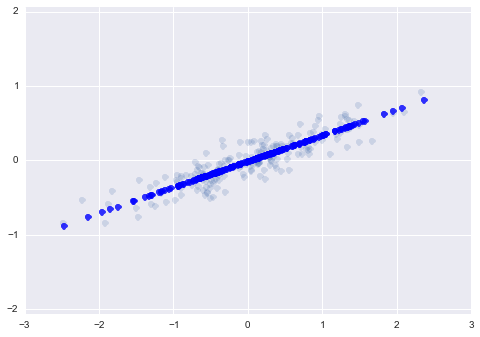

In [16]:
# PCA with 1 component
clf = PCA(n_components=1)
X_trans = clf.fit_transform(X)          # Project onto principal directions
X_new = clf.inverse_transform(X_trans)  # Return to unprojected space
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.2)
plt.plot(X_new[:, 0], X_new[:, 1], 'ob', alpha=0.8)
plt.axis('equal');

## K-means

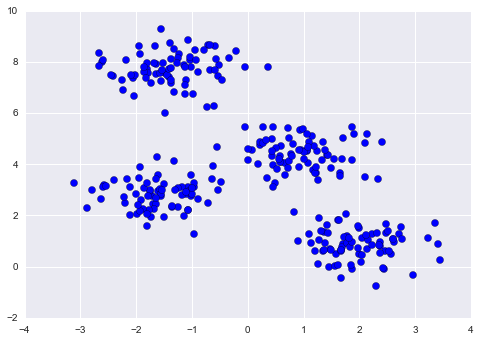

In [17]:
# Make fake clustered data
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], s=50);

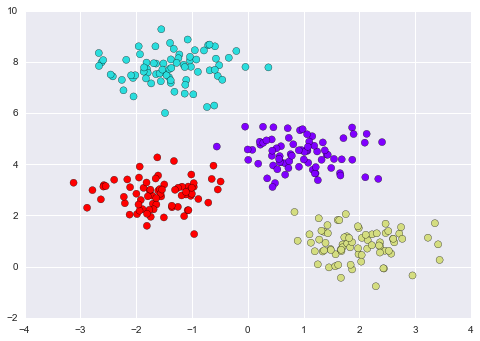

In [18]:
# Cluster into 4 clusters using K-means
from sklearn.cluster import KMeans
est = KMeans(4)  # 4 clusters
est.fit(X)
y_kmeans = est.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow');